어떤 features가 예측에 가장 큰 영향을 주는지를 물어볼 수 있다.<br>
이 개념을 ***feature importance***라고 한다.<br>
feature importance를 측정하는 방법은 다양하다. 어떤 접근법은 위 질문에 미묘하게 다른 version으로 answer한다. 다른 접근법에는 단점들이 문서화되어 있다. <br><br>
이 레슨에서 우리는 ***permutation importance***에 대해 알아볼 것이다. 다른 접근법들과 비교했을때 permutation importance는 
- 빠른 계산
- 널리 사용되고 이해
- feature importance 측정이 필요한 속성과 일치

## How It Works
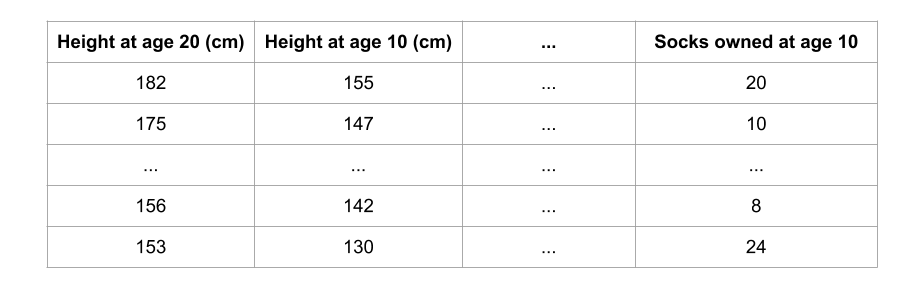

우리는 10살 때 데이터를 사용하여 20살이 되었을 때 그사람의 키를 예측하고싶다. <br>
우리의 데이터는 유용한 features(height at age 10), 예측 능력이 거의 없는(Socks owned). 또한 이 설명에서 중점적으로 다루지 않을 몇 가지 특징도 있다.<br>
Permutation importance는 모델에 fit시킨 후에 계산된다. 따라서 모델을 변경하거나 예측값을 변경하지 않는다. <br><br>
검증 데이터의 단일 열을 무작위로 섞고 목표값과 다른 모든 열을 그대로 두는 경우, 그것이 이제 섞인 데이터의 예측 정확도에 어떤 영향을 미칠까? <br>
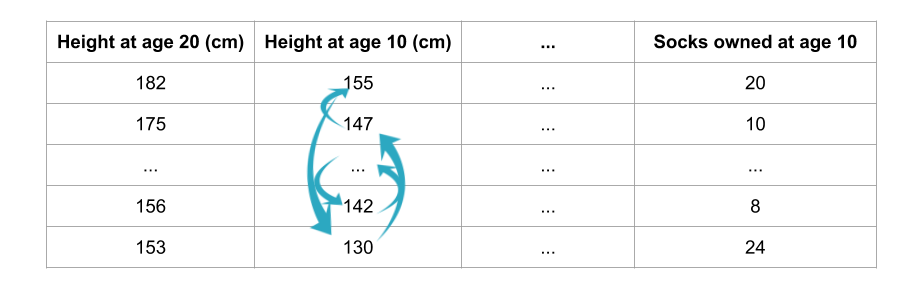
단일 열의 순서를 랜덤하게 다시 지정하면 결과 데이터가 더 이상 실제 환경에서 관측된 데이터와 일치하지 않기 때문에 예측의 정확도가 떨어진다. 에측에 크게 의존한 열을 섞으면 모델 정확도가 특히 떨어진다. 이 경우에 Height at age 10을 섞으면 끔찍한 예측이 나오지만 socks owned을 섞는다면 결과 예측은 거의 타격이 없을 것이다.

## Code Example

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


data = pd.read_csv('../input/fifa-2018-match-statistics/FIFA 2018 Statistics.csv')
y = (data['Man of the Match'] == "Yes")

feature_names = [i for i in data.columns if data[i].dtype in [np.int64]]

X = data[feature_names]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

my_model = RandomForestClassifier(n_estimators=100,
                                 random_state=0).fit(train_X, train_y)

In [7]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.1750 ± 0.0848,Goal Scored
0.0500 ± 0.0637,Distance Covered (Kms)
0.0437 ± 0.0637,Yellow Card
0.0187 ± 0.0500,Off-Target
0.0187 ± 0.0637,Free Kicks
0.0187 ± 0.0637,Fouls Committed
0.0125 ± 0.0637,Pass Accuracy %
0.0125 ± 0.0306,Blocked
0.0063 ± 0.0612,Saves
0.0063 ± 0.0250,Ball Possession %


## Interpreting Permutation Importances
상단에 있는 값들은 중요한 features지만 하단에 있는 것들은 그렇지 않다.<br><br>
각 행 첫번째 숫자는 random suffling(이 경우 성능 metrics로 accuracy 사용)으로 모델 성능이 얼마나 감소했는지 보여준다.<br><br>
Permutation importance에 대해 음수 값이 표현되는 경우 섞이거나 노이즈가 많은 데이터에 대한 예측이 더 정확했다. 이 문제는 feature가 중요하지 않고(should have had an importance close to 0)) 랜덤 확률로 인해 변동 데이터에 대한 예측이 더 정확할 때 발생한다.